In [1]:
import cv2
import matplotlib.pyplot as plt
from keras.models import model_from_json
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split

C:\Users\Bilawal Abbasi\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
X = joblib.load('train_features_joblib')
Y = joblib.load('train_labels_joblib')
X_train,X_test,Y_train,Y_Test = train_test_split(X,Y,test_size = 0.1)

In [3]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
loaded_model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

In [21]:
def prepare(image):
    IMG_SIZE = 500
    new_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    plt.imshow(image,cmap = 'gray')
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
Categories = ['Defective','Non Defective']

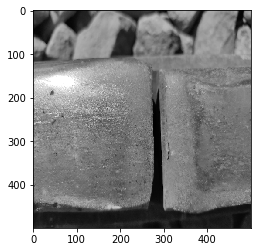

[[0.]]
Defective


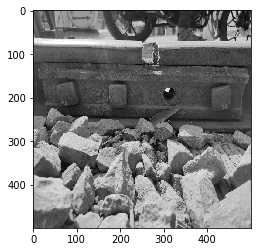

[[1.]]
Non Defective


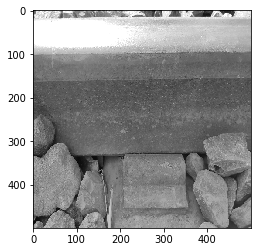

[[1.]]
Non Defective


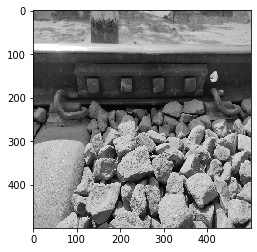

[[1.]]
Non Defective


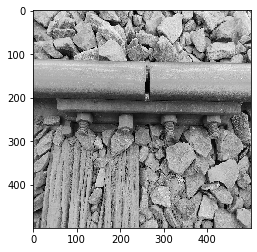

[[0.]]
Defective


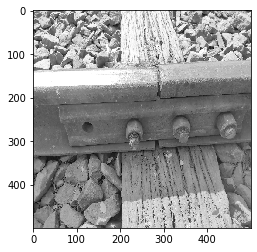

[[1.]]
Non Defective


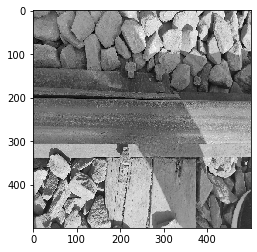

[[1.]]
Non Defective


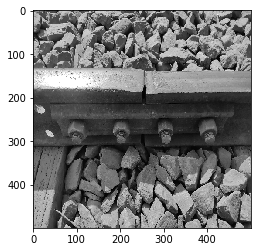

[[0.]]
Defective


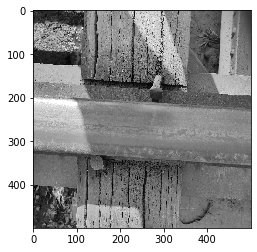

[[1.]]
Non Defective


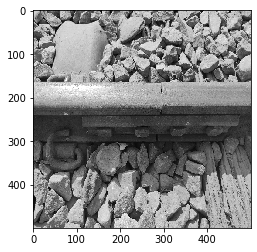

[[0.]]
Defective


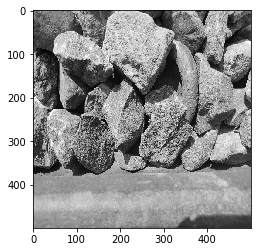

[[1.]]
Non Defective


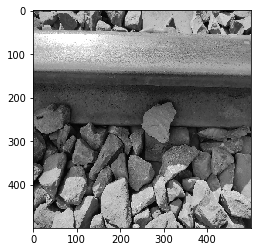

[[1.]]
Non Defective


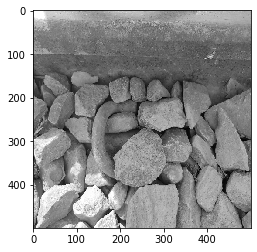

[[1.]]
Non Defective


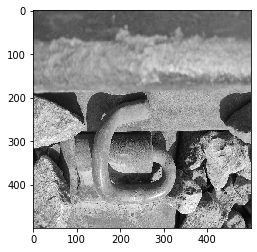

[[1.]]
Non Defective


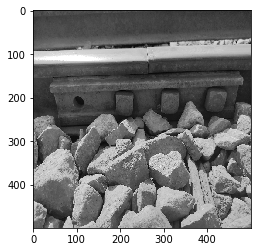

[[1.]]
Non Defective


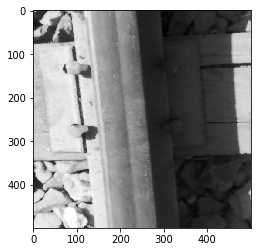

[[1.]]
Non Defective


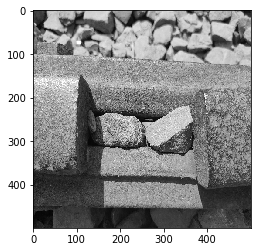

[[0.]]
Defective


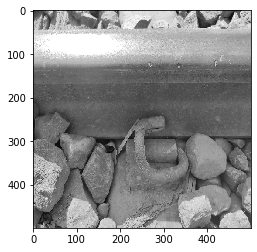

[[1.]]
Non Defective


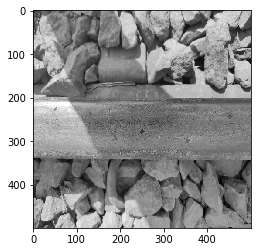

[[0.]]
Defective


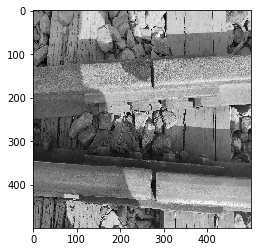

[[0.]]
Defective


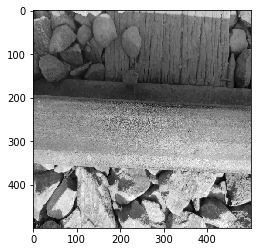

[[1.]]
Non Defective


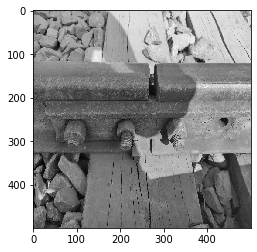

[[0.]]
Defective


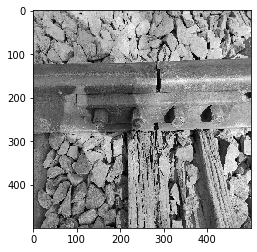

[[0.]]
Defective


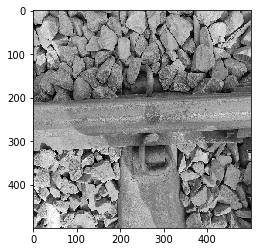

[[1.]]
Non Defective


In [23]:
import numpy as np
for i in range(len(X_test)):
    prediction = loaded_model.predict([prepare(np.reshape(X_test[i],(500,500)))])
    print(prediction)
    print(Categories[int(prediction)])

# Incase of reading image from directory replace above with this definition of prepare method 

def prepare(filepath):
    IMG_SIZE = 500
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array,cmap = 'gray')
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# This is an example 

prediction = loaded_model.predict([prepare('C:/Users/Bilawal Abbasi/Python Practice/dataset/Test/Non defective/IMG_20201114_100209.jpg')])

Categories[int(prediction)] -------->print output